In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

customer_df = pd.read_csv('../data/clean/customers.csv', dtype={'Country': 'category'})
customer_df['FirstPurchaseDate'] = pd.to_datetime(customer_df['FirstPurchaseDate'])
customer_df['LastPurchaseDate'] = pd.to_datetime(customer_df['LastPurchaseDate'])
customer_df.set_index('Customer ID', inplace=True)
customer_df.head()

,NumOrders,TotalQuantity,TotalSpend,FirstPurchaseDate,LastPurchaseDate,UniqueProducts,Country
Customer ID,,,,,,,
12346,2,24,169.36,2010-03-02 13:08:00,2010-06-28 13:53:00,24,United Kingdom
12347,2,828,162.95,2010-10-31 14:20:00,2010-12-07 14:57:00,70,Iceland
12348,1,372,13.39,2010-09-27 14:59:00,2010-09-27 14:59:00,19,Finland
12349,2,991,425.34,2010-04-29 13:20:00,2010-10-28 08:23:00,89,Italy
12351,1,261,49.46,2010-11-29 15:23:00,2010-11-29 15:23:00,21,Unspecified


In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4285 entries, 12346 to 18287
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   NumOrders          4285 non-null   int64         
 1   TotalQuantity      4285 non-null   int64         
 2   TotalSpend         4285 non-null   float64       
 3   FirstPurchaseDate  4285 non-null   datetime64[ns]
 4   LastPurchaseDate   4285 non-null   datetime64[ns]
 5   UniqueProducts     4285 non-null   int64         
 6   Country            4285 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(1), int64(3)
memory usage: 239.9 KB


# Feature Engineering

In [4]:
last_date = customer_df['LastPurchaseDate'].max()

customer_df['Recency'] = (last_date - customer_df['LastPurchaseDate']).dt.days
customer_df['Duration'] = (customer_df['LastPurchaseDate'] - customer_df['FirstPurchaseDate']).dt.days
customer_df['AvgSpendPerOrder'] = customer_df['TotalSpend'] / customer_df['NumOrders']
customer_df['AvgQuantityPerOrder'] = customer_df['TotalQuantity'] / customer_df['NumOrders']

# EDA

## Univariate Analysis

In [5]:
customer_df.describe()

,NumOrders,TotalQuantity,TotalSpend,FirstPurchaseDate,LastPurchaseDate,UniqueProducts,Recency,Duration,AvgSpendPerOrder,AvgQuantityPerOrder
count,4285.000000,4285.000000,4285.000000,4285,4285,4285.000000,4285.000000,4285.000000,4285.000000,4285.000000
mean,4.426138,1291.465578,283.673638,2010-04-29 07:41:10.613768960,2010-09-11 00:06:10.431738624,63.907585,89.548191,134.357293,66.862224,261.517669
min,1.000000,1.000000,0.190000,2009-12-01 07:45:00,2009-12-01 10:49:00,1.000000,0.000000,0.000000,0.190000,1.000000
25%,1.000000,162.000000,54.700000,2010-01-14 16:33:00,2010-07-27 14:39:00,17.000000,17.000000,0.000000,28.650000,91.000000
50%,2.000000,386.000000,131.760000,2010-04-01 11:55:00,2010-10-19 12:10:00,38.000000,51.000000,106.000000,54.030000,153.142857
75%,5.000000,1001.000000,315.140000,2010-08-15 13:10:00,2010-11-22 11:24:00,79.000000,135.000000,254.000000,87.985000,260.500000
max,183.000000,220596.000000,19798.660000,2010-12-09 16:08:00,2010-12-09 20:01:00,1737.000000,373.000000,373.000000,775.700000,87167.000000
std,7.938017,6478.007016,623.949921,NaN,NaN,85.766908,96.359872,132.779425,57.385236,1572.861538


In [6]:
customer_df.columns

Index(['NumOrders', 'TotalQuantity', 'TotalSpend', 'FirstPurchaseDate',
       'LastPurchaseDate', 'UniqueProducts', 'Country', 'Recency', 'Duration',
       'AvgSpendPerOrder', 'AvgQuantityPerOrder'],
      dtype='object')

In [7]:
segmentation_df = customer_df.drop(columns=['FirstPurchaseDate', 'LastPurchaseDate', 'Country'])

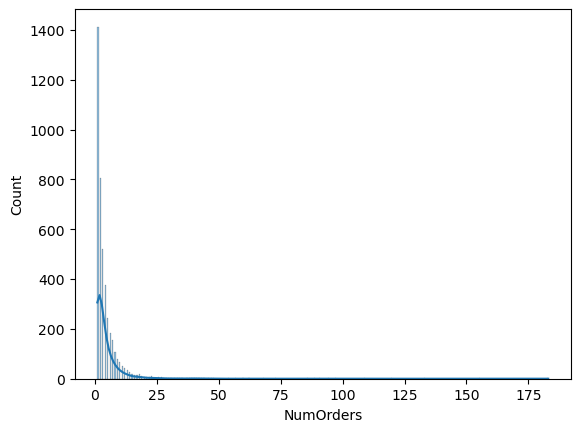

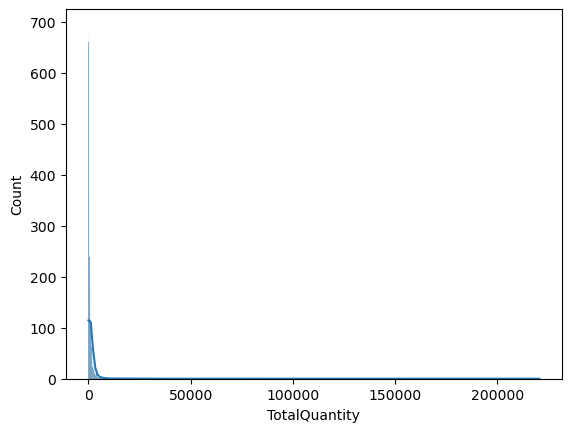

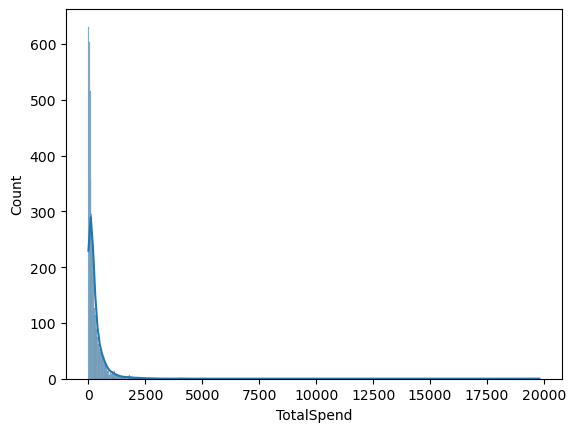

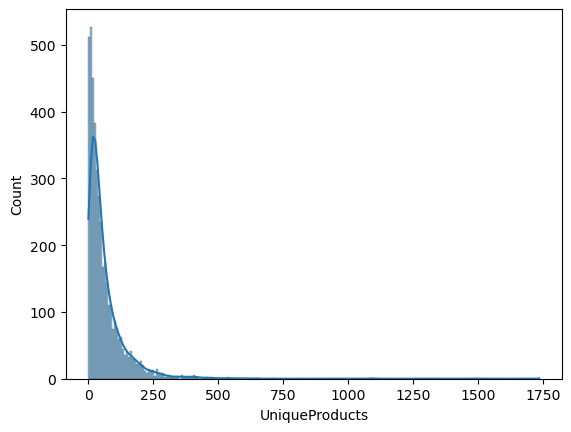

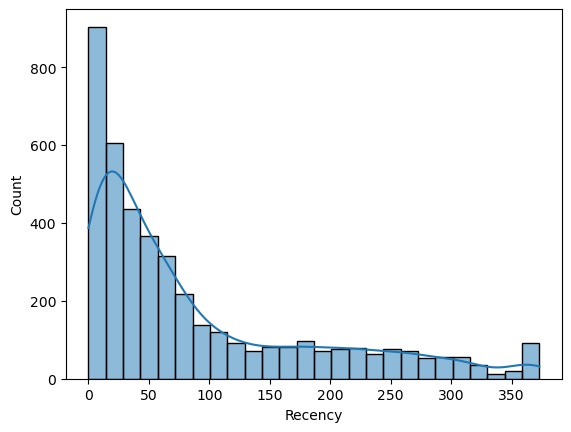

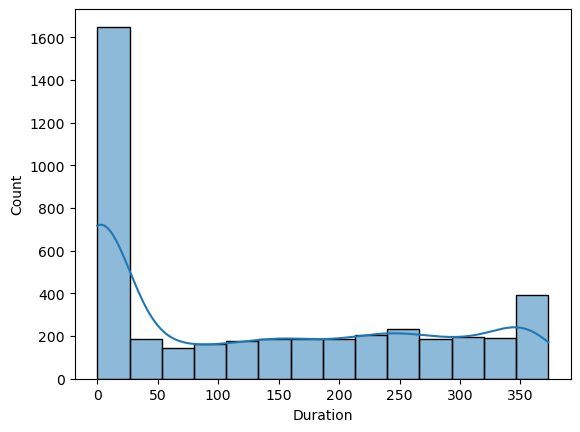

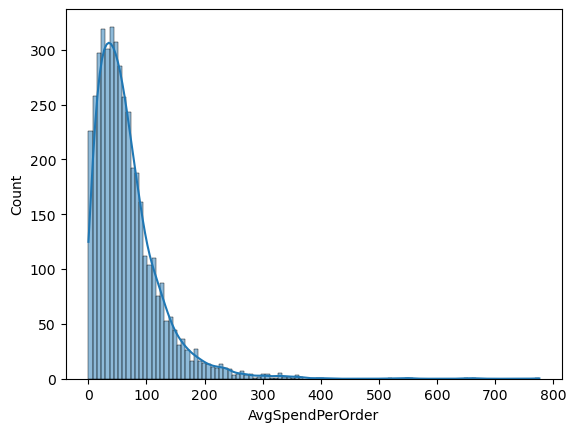

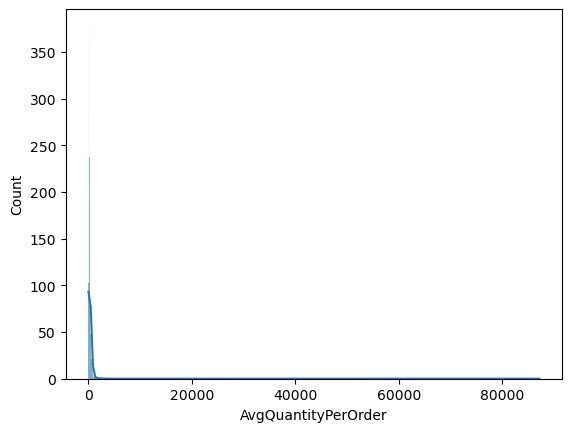

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in segmentation_df.columns:
    plt.figure()
    sns.histplot(segmentation_df[col], kde=True)
plt.show()

In [12]:
import numpy as np

log_segmentation_df = np.log1p(segmentation_df.drop('Duration', axis=1))
log_segmentation_df['Duration'] = customer_df['Duration']

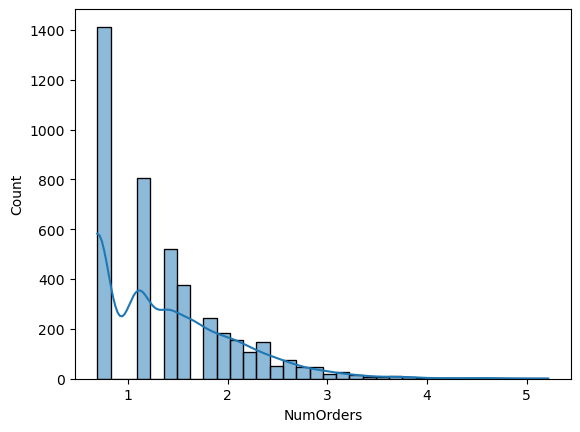

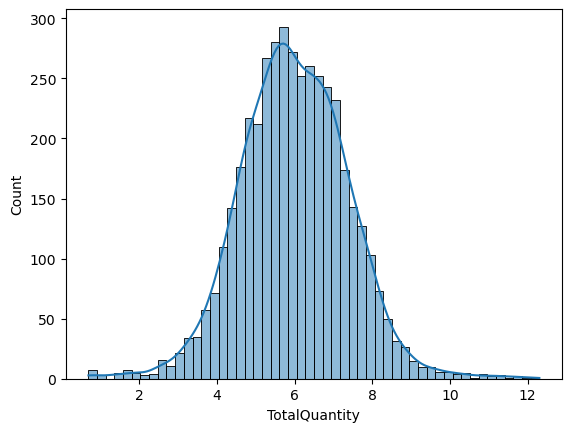

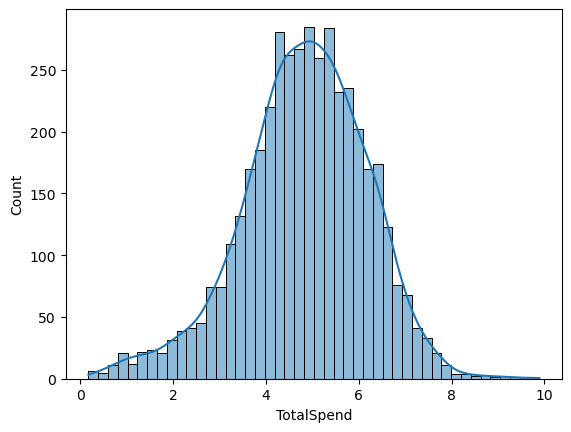

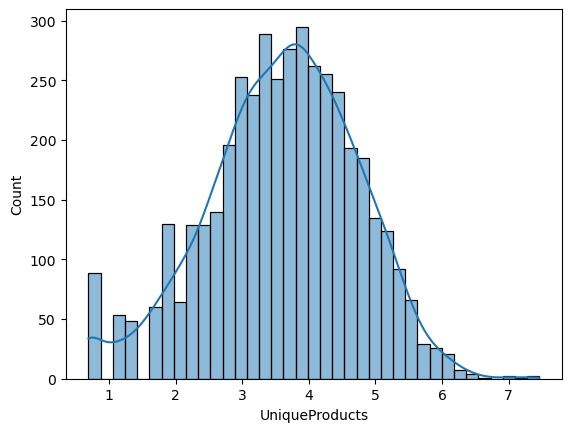

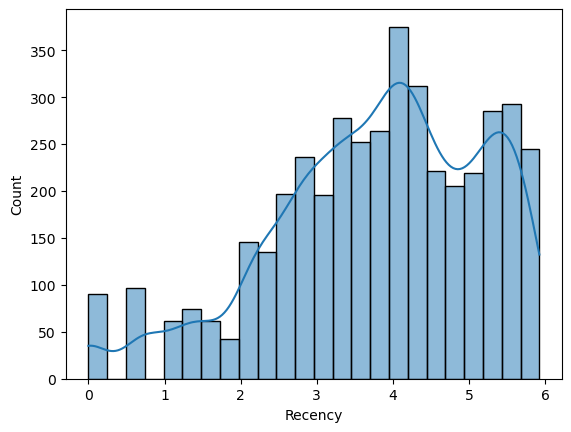

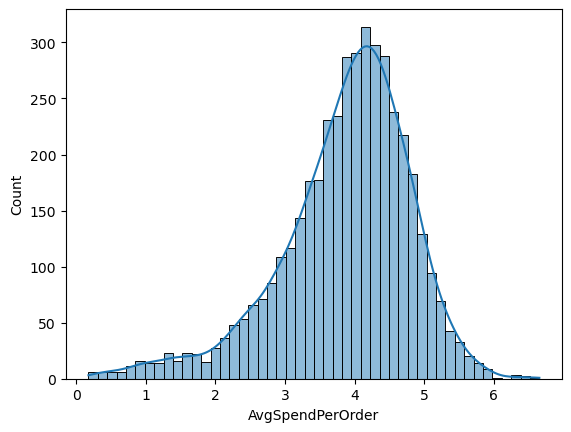

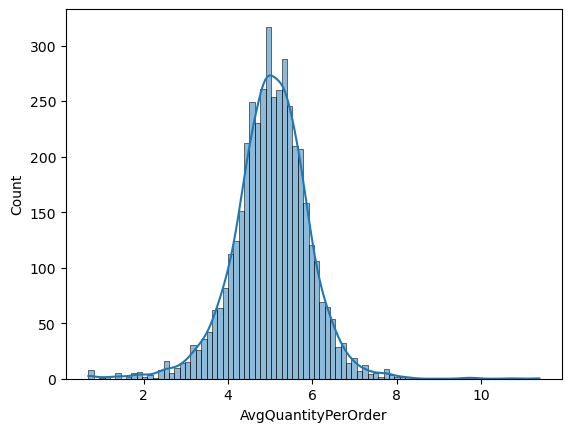

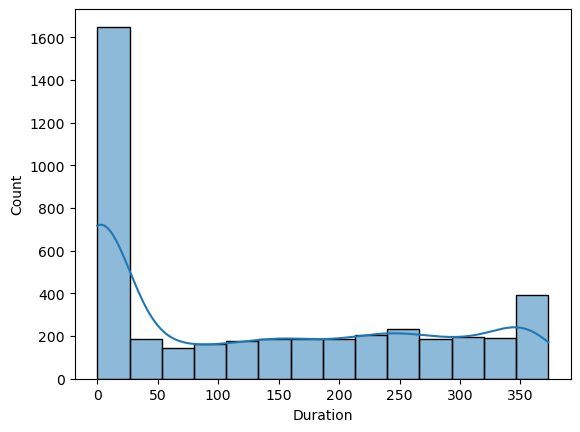

In [13]:
for col in log_segmentation_df.columns:
    plt.figure()
    sns.histplot(log_segmentation_df[col], kde=True)
plt.show()

# Multivariate Analysis

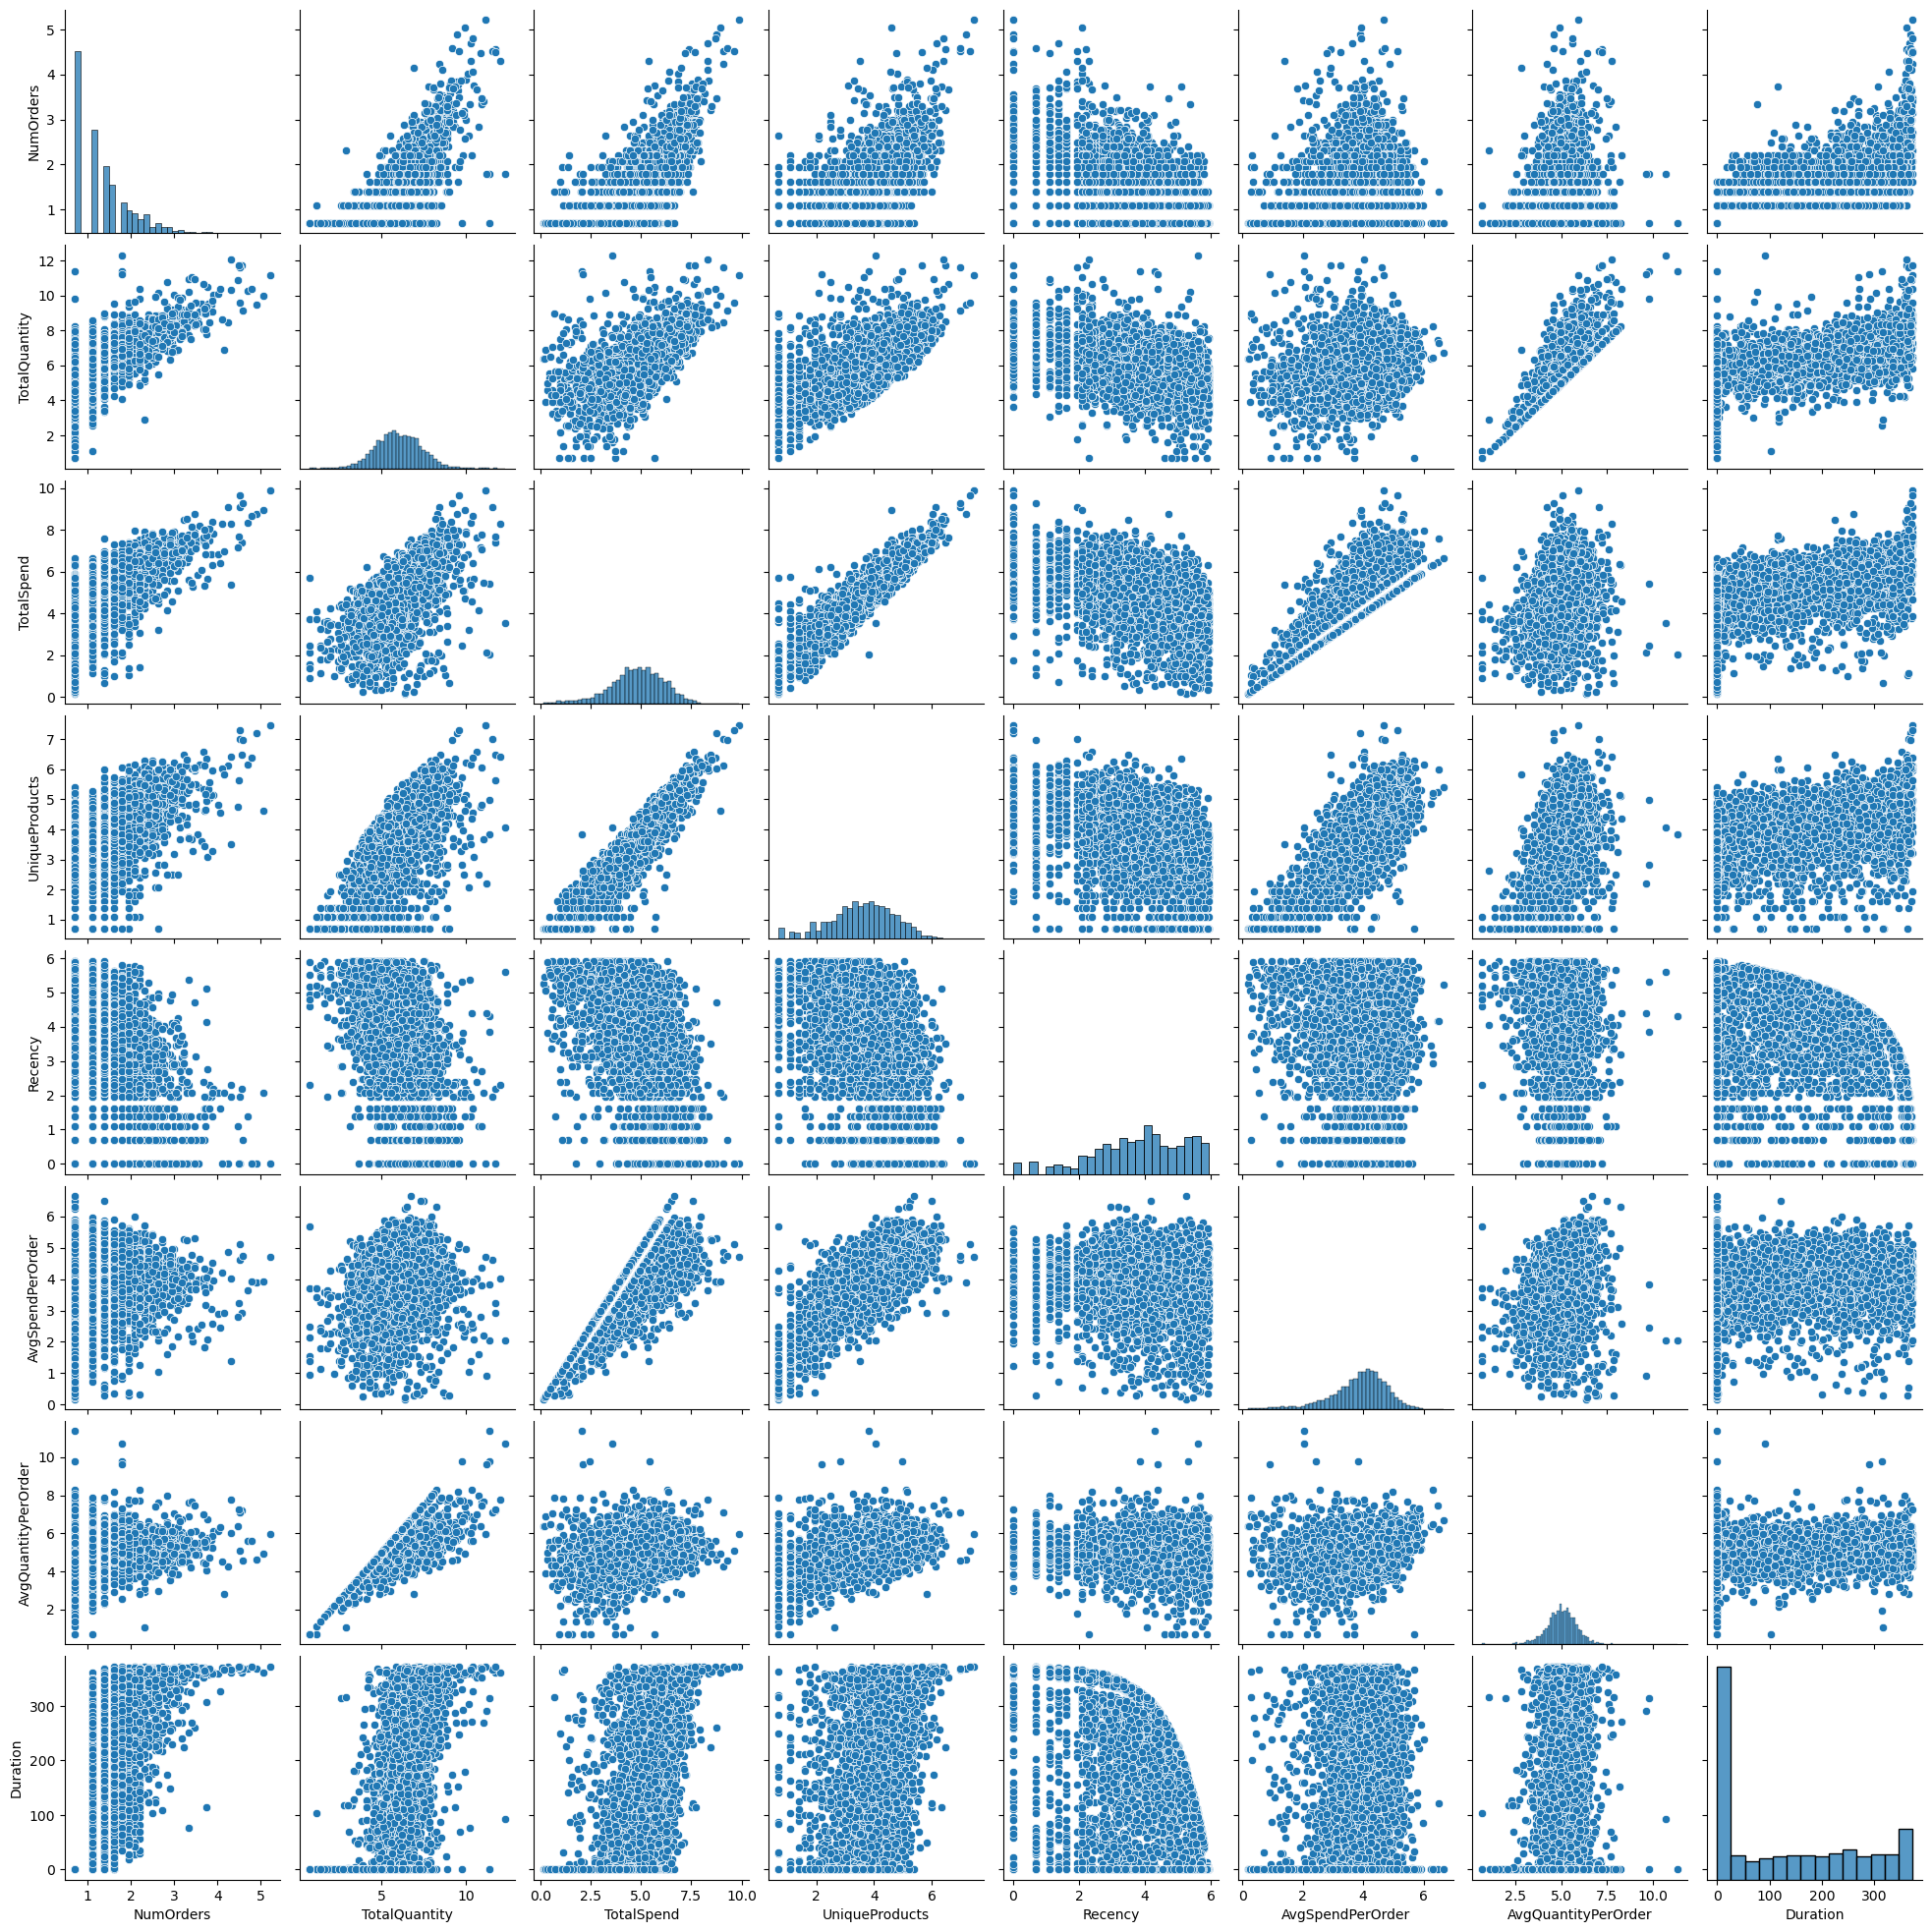

In [14]:
sns.pairplot(log_segmentation_df)

# Clustering

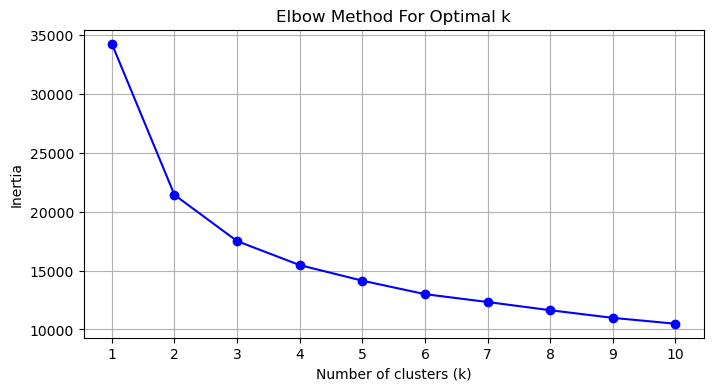

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_segmentation_df)

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()

In [24]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
cluster_labels2 = kmeans.fit_predict(scaled_data)
log_segmentation_df['2_Clusters'] = cluster_labels2
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
cluster_labels3 = kmeans.fit_predict(scaled_data)
log_segmentation_df['3_Clusters'] = cluster_labels3

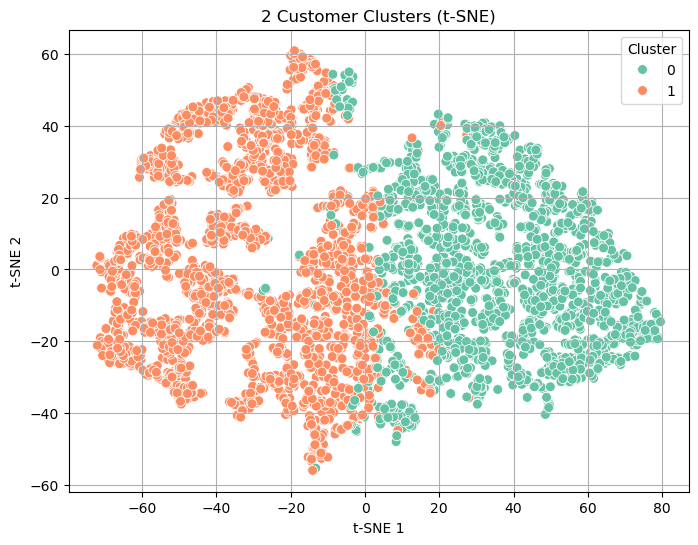

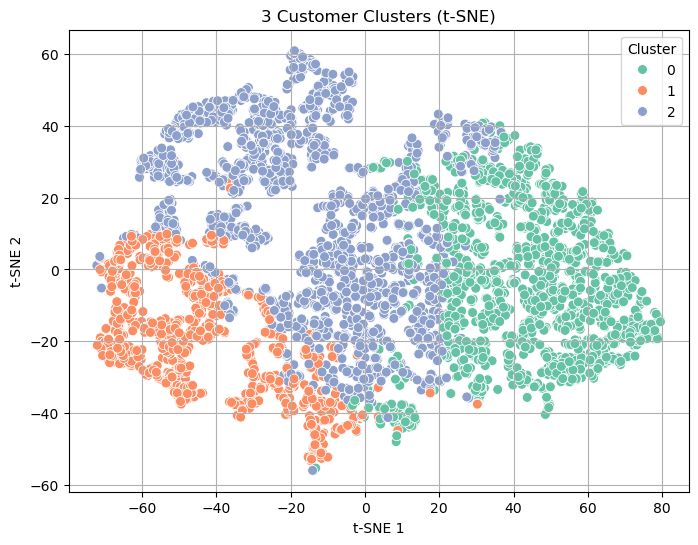

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1],
                hue=cluster_labels2, palette='Set2', s=50)
plt.title('2 Customer Clusters (t-SNE)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.grid(True)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1],
                hue=cluster_labels3, palette='Set2', s=50)
plt.title('3 Customer Clusters (t-SNE)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.grid(True)

plt.show()

In [26]:
from sklearn.metrics import silhouette_score

sil_score2 = silhouette_score(scaled_data, cluster_labels2)
sil_score3 = silhouette_score(scaled_data, cluster_labels3)

print(f'Silhouette Score for k=2: {sil_score2:.4f}')
print(f'Silhouette Score for k=3: {sil_score3:.4f}')

Silhouette Score for k=2: 0.3231
Silhouette Score for k=3: 0.2536


In [27]:
segmentation_df['2_Clusters'] = log_segmentation_df['2_Clusters']
segmentation_df.groupby('2_Clusters').mean()

,NumOrders,TotalQuantity,TotalSpend,UniqueProducts,Recency,Duration,AvgSpendPerOrder,AvgQuantityPerOrder
2_Clusters,,,,,,,,
0,7.613193,2449.317341,522.590990,111.755122,39.570215,237.628686,82.851600,353.282582
1,1.633975,277.077933,74.359444,21.988616,133.333625,43.881786,52.854018,181.122926


In [28]:
segmentation_df['3_Clusters'] = log_segmentation_df['3_Clusters']
segmentation_df.groupby('3_Clusters').mean()

,NumOrders,TotalQuantity,TotalSpend,UniqueProducts,Recency,Duration,AvgSpendPerOrder,AvgQuantityPerOrder,2_Clusters
3_Clusters,,,,,,,,,
0,9.137591,2948.888084,615.552186,126.490454,29.857143,271.682028,77.100392,312.064927,0.000658
1,1.640091,226.234624,27.159567,8.009112,142.362187,46.250569,19.652982,126.434061,0.996583
2,1.931144,453.355403,135.948978,39.551377,113.012182,64.845339,80.579351,283.669216,0.745763


In k=2, the two clusters stand out significantly. Cluster 0 is clearly high value while cluster 1 are low value customers.

In k=3, cluster 0 still stands out, while cluster 2 is better than cluster 1.

In [29]:
customer_df['Value'] = segmentation_df['3_Clusters'].replace({0: 'High', 1:'Low', 2:'Medium'})

In [30]:
customer_df.to_csv('../data/clean/customers.csv')